In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns   

import sklearn

In [35]:
# Read in the data
df = pd.read_csv('data/bank_customers.csv')
df.head()

,customer_id,age,salary,num_of_products,is_active_member,churn
0,BC00001,48,46726.06,1,1,0
1,BC00002,38,20000.00,1,0,0
2,BC00003,62,23945.14,4,1,0
3,BC00004,44,61902.32,3,1,0
4,BC00005,18,20000.00,4,1,1


In [36]:
# Basic distributions and correlations
df.describe(include='all')

,customer_id,age,salary,num_of_products,is_active_member,churn
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,1000,NaN,NaN,NaN,NaN,NaN
top,BC00001,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.994000,52492.046600,2.084000,0.701000,0.137000
std,NaN,13.670949,26286.398253,1.095511,0.458049,0.344019
min,NaN,18.000000,20000.000000,1.000000,0.000000,0.000000
25%,NaN,29.000000,28665.197500,1.000000,0.000000,0.000000
50%,NaN,40.000000,51407.080000,2.000000,1.000000,0.000000
75%,NaN,50.000000,70509.012500,3.000000,1.000000,0.000000


In [37]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop(["customer_id"], axis=1) # drop the customer_id column as it's not a feature
y = df["churn"] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=731)

In [38]:
# Scale numerical features, with mean=0 and std=1
# Many machine learning algorithms are sensitive to the scale of the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["age", "salary"]] = scaler.fit_transform(df[["age", "salary"]])
df.head()

,customer_id,age,salary,num_of_products,is_active_member,churn
0,BC00001,0.585914,-0.219462,1,1,0
1,BC00002,-0.145930,-1.236697,1,0,0
2,BC00003,1.610496,-1.086539,4,1,0
3,BC00004,0.293177,0.358169,3,1,0
4,BC00005,-1.609618,-1.236697,4,1,1


In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {model.score(X_test, y_test):.4f}")

Accuracy: 1.0000


/Users/chicheng/Documents/Dev/interview_prep/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Chains multiple steps of data preprocessing and model training together
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Accuracy:", pipe.score(X_test, y_test))

Accuracy: 1.0


In [10]:
# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[100   0]
 [  0 100]]


In [31]:
# Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation score:", scores.std())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
Standard deviation of cross-validation score: 0.0


/Users/chicheng/Documents/Dev/interview_prep/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chicheng/Documents/Dev/interview_prep/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

In [33]:
# Build a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", rf_model.score(X_test, y_test))

Accuracy: 1.0


In [34]:
# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


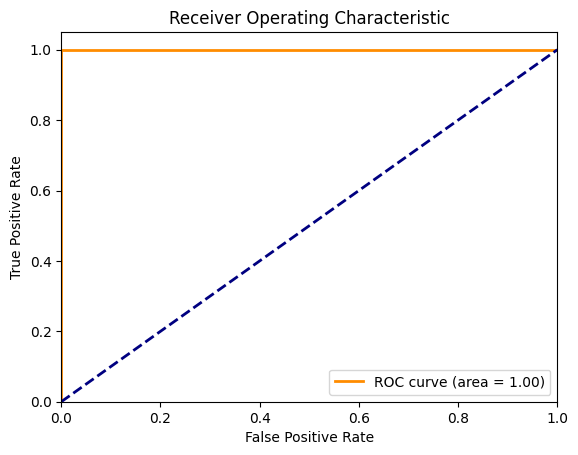

In [40]:
# Visualize AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()